In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [59]:
Salary=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
Salary

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [60]:
Salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [61]:
type(Salary)

pandas.core.frame.DataFrame

In [62]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [63]:
Salary.shape

(397, 6)

In [64]:
Salary.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [65]:
Salary.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

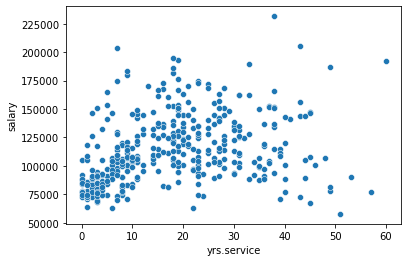

In [66]:
sns.scatterplot(x="yrs.service",y="salary",data=Salary)

<AxesSubplot:xlabel='yrs.service', ylabel='rank'>

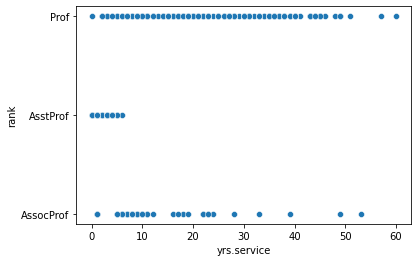

In [67]:
sns.scatterplot(x="yrs.service",y="rank",data=Salary)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

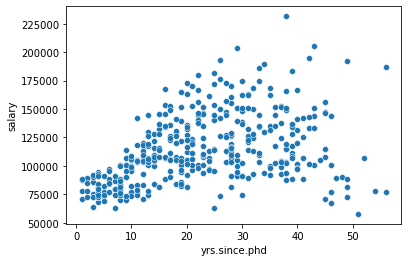

In [68]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=Salary)

In [69]:
Salary.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [70]:
Salary.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

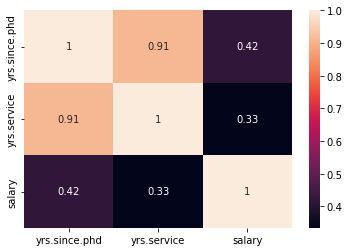

In [71]:
sns.heatmap(Salary.corr(),annot=True)

In [72]:
Salary.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


yrs.since.phd       AxesSubplot(0.125,0.536818;0.110714x0.343182)
yrs.service      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
salary           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
dtype: object

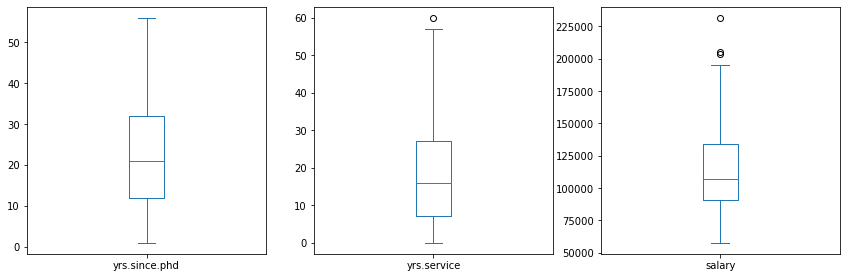

In [73]:
Salary.plot(kind='box',subplots=True,layout=(2,6),figsize=(30,10))

In [74]:
Salary.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_1332/1830778543.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Salary.skew()


yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

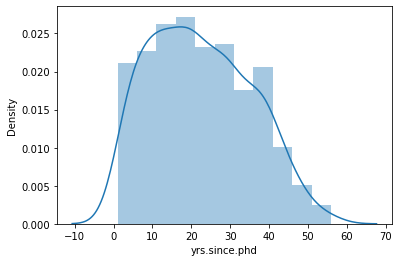

In [75]:
sns.distplot(Salary['yrs.since.phd'])

<AxesSubplot:ylabel='Frequency'>

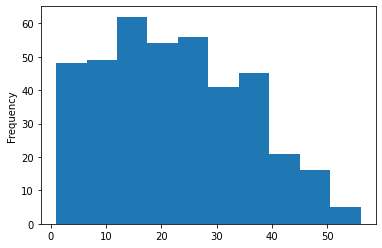

In [76]:
Salary['yrs.since.phd'].plot.hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

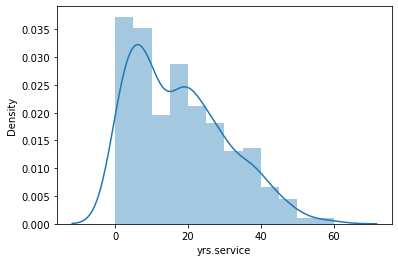

In [77]:
sns.distplot(Salary['yrs.service'])

<AxesSubplot:ylabel='Frequency'>

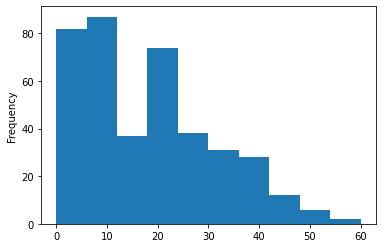

In [78]:
Salary['yrs.service'].plot.hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

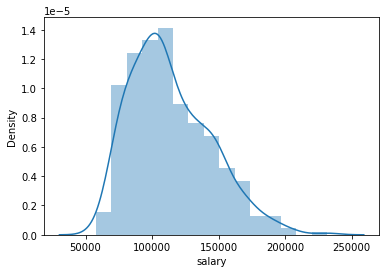

In [79]:
sns.distplot(Salary['salary'])

<AxesSubplot:ylabel='Frequency'>

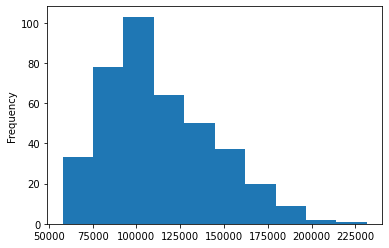

In [80]:
Salary['salary'].plot.hist()

In [81]:
Salary

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [95]:
Salary.drop(['discipline','sex'],axis=1,inplace=True)


KeyError: "['discipline' 'sex'] not found in axis"

In [96]:
Salary

,rank,yrs.since.phd,yrs.service,salary
0,Prof,19,18,139750
1,Prof,20,16,173200
2,AsstProf,4,3,79750
3,Prof,45,39,115000
4,Prof,40,41,141500
...,...,...,...,...
392,Prof,33,30,103106
393,Prof,31,19,150564
394,Prof,42,25,101738
395,Prof,25,15,95329


In [83]:
x=Salary.iloc[:,0:-1]
x.head()

,rank,yrs.since.phd,yrs.service
0,Prof,19,18
1,Prof,20,16
2,AsstProf,4,3
3,Prof,45,39
4,Prof,40,41


In [97]:
Salary.drop(['rank'],axis=1,inplace=True)

In [98]:
Salary

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [99]:
x.shape

(397, 3)

In [100]:
y=Salary.iloc[:,-1]
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [101]:
y.shape

(397,)

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [103]:
x_train.shape

(265, 3)

In [104]:
y_train.shape

(265,)

In [105]:
x_test.shape

(132, 3)

In [106]:
y_test.shape

(132,)

In [108]:
lm= LinearRegression()

In [110]:
lm.fit(x_train,y_train)

ValueError: could not convert string to float: 'Prof'

In [ ]:
# Even after removing rank column it give error not able to solve the above error could not proceed further